# K- Nearest Neighbours - Zoo

#### Implement a KNN model to classify the animals in to categories

## Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [11]:
Zoo_Data=pd.read_csv("C:\\ExcelR\\Assignments\\KNN\\Zoo.csv")

In [12]:
Zoo_Data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Data Understanding

In [13]:
Zoo_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [14]:
Zoo_Data.shape

(101, 18)

#### * No null entries found
#### * All Data points are either int or float

## Seaparating Dependant and independant variables

In [15]:
Ind_Var=Zoo_Data.drop(["type","animal name"],axis=1)
y=Zoo_Data["type"]

In [36]:
y.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

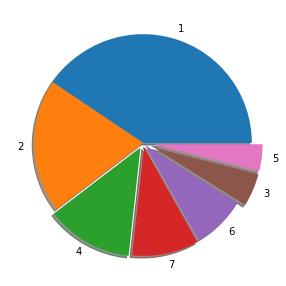

In [57]:
plt.figure(figsize=(8,5))
plt.pie(x=y.value_counts(),labels=[1,2,4,7,6,3,5],explode=[0,0,0.05,0.04,0.03,0.1,0.1],shadow=True)
plt.show()

## Data preprocessing

In [16]:
Standard_Scalar=StandardScaler()

In [17]:
X=pd.DataFrame(Standard_Scalar.fit_transform(Ind_Var))

In [18]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180


In [21]:
X.columns=Ind_Var.columns
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180


## Model Building || Model Training || Model Testing

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state= 12,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((80, 16), (80,), (21, 16), (21,))

## Generating a Model with K = 3

In [23]:
from sklearn.metrics import accuracy_score

Knn_model_3 = KNeighborsClassifier(n_neighbors=3)
Knn_model_3.fit(X_train,y_train)
y_pred = Knn_model_3.predict(X_test)

print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.9524


## Model Optimization

### Grid Search CV

In [27]:
n_neighbors = np.array(range(1,15))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}

In [28]:
loo=LeaveOneOut()

KNN = KNeighborsClassifier()
grid = GridSearchCV(estimator=KNN, param_grid=param_grid ,cv=loo)
grid.fit(X,y)

GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [29]:
print(grid.best_params_,grid.best_score_)

{'n_neighbors': 1} 0.9504950495049505


### Since K=1 shows high accuracy we check for test data accuracy

In [30]:
from sklearn.metrics import accuracy_score

Knn_model_1 = KNeighborsClassifier(n_neighbors=1)
Knn_model_1.fit(X_train,y_train)
y_pred = Knn_model_1.predict(X_test)

print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.9524


#### Since, there is no significant difference in the accuracy scores of train and test data, We can imply that there is no problem of overfitting in the model with value k=1.

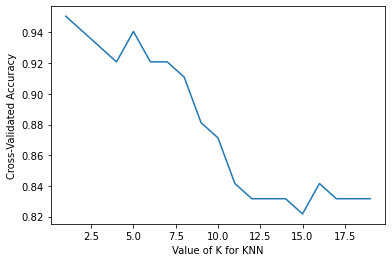

In [34]:
k_range=range(1,20)
k_scores=[]

for i in k_range:
    model=KNeighborsClassifier(n_neighbors=i)
    results=cross_val_score(model, X,y,cv=loo)
    k_scores.append(results.mean())

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Model Knn_model_1 is chosen for deployment